# Building a Deep Feedforward Neural Network
In the previous chapter (cuadernos 001 a 003), we looked at the basics of the function of a neural network. In this chapter, we will get into the details of the functions associated to the various hyperparameters within a neural network.

## Training a vanilla neural network
The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community.

### How to do it...

1. Import the relevant packages:

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

`X_train` and `y_train` form the "training set", the data that the model will learn from. The model will then be tested on the "test set", `X_test` and `y_test`. Our images `X` are encoded as Numpy arrays, and the labels `y` are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels. Let's have a look at the training data:

In [332]:
X_train.shape

(60000, 28, 28)

In [333]:
len(y_train)

60000

In [334]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [335]:
X_test.shape

(10000, 28, 28)

In [336]:
len(y_test)

10000

In [337]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's plot a few images to see what they will look like:

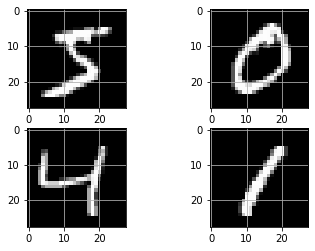

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

2. Before training, we will preprocess our data by reshaping it into the shape that the network expects: 

In [339]:
# flatten 28x28 images to a 784 (pixel values) vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


Additionally, preprocess the labels (convert them into one-hot encoded vectors):

In [340]:
# one-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In Keras, the one-hot encoding approach on top of labels is performed using the `to_categorical` method, which figures out the number of unique labels in the target data, and then converts them into a one-hot encoded vector.

Let's try to understand how one-hot encoding works. If the unique possible labels are `{0, 1, 2, 3}`, they will be one-hot encoded, as follows:

| Label | | | | |
| :- | :-: | :-: | :-: | :-: |
| **0** | 1 | 0 | 0 | 0 |
| **1** | 0 | 1 | 0 | 0 |
| **2** | 0 | 0 | 1 | 0 |
| **3** | 0 | 0 | 0 | 1 |

3. Initialize a model and define the model architecture:

In [341]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In the preceding step, we mention that the input has `784` values that are connected to `1000` values in a hidden layer. Additionally, we are also specifying that the activation, which is to be performed in the hidden layer after the matrix multiplication of the input and the weights connecting the input and hidden layer, is the `ReLU` activation.

Finally, the hidden layer is connected to an output that has `10` values (as there are 10 columns in the vectors created by the `to_categorical` method), and we perform `softmax` on top of the output so that we obtain the probability of an image belonging to a certain class.

4. The preceding model architecture can be visualized as follows:

In [342]:
model.summary()

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 1000)              785000    
_________________________________________________________________
dense_189 (Dense)            (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


As we see, the number of parameters in the first layer is `785000`, as the `784` input units are connected to `1000` hidden units, resulting in `784*1000` weight values and `1000` bias values, for the `1000` hidden units.

Similarly, the output layer has `10` outputs, which are connected to each of the `1000` hidden units, resulting in `1000*10` weight values and `10` biases (a total of `10010` parameters).

5. Compile the model:

In [343]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Note that because the target variable is a one-hot encoded vector with multiple classes in it, the loss function will be a `categorical cross-entropy` loss.

Additionally, we use the `Adam` optimizer to minimize the cost function.

We also note that we will need to look at the `accuracy metric` while the model is getting trained.

6. Fit the model:

In [344]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
59/59 [==============================] - 0s 8ms/step - loss: 16.7997 - accuracy: 0.8408 - val_loss: 2.6452 - val_accuracy: 0.9389
Epoch 2/50
59/59 [==============================] - 0s 7ms/step - loss: 1.7335 - accuracy: 0.9468 - val_loss: 1.3086 - val_accuracy: 0.9487
Epoch 3/50
59/59 [==============================] - 0s 7ms/step - loss: 0.7411 - accuracy: 0.9631 - val_loss: 1.0337 - val_accuracy: 0.9537
Epoch 4/50
59/59 [==============================] - 0s 7ms/step - loss: 0.4042 - accuracy: 0.9738 - val_loss: 0.8605 - val_accuracy: 0.9590
Epoch 5/50
59/59 [==============================] - 0s 7ms/step - loss: 0.2379 - accuracy: 0.9802 - val_loss: 0.8134 - val_accuracy: 0.9608
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1530 - accuracy: 0.9856 - val_loss: 0.7644 - val_accuracy: 0.9634
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0958 - accuracy: 0.9890 - val_loss: 0.7501 - val_accuracy: 0.9628
Epoch 8/50
59/59 [=

In the preceding code, we have specified the input `X_train` and the output `y_train` that the model will fit. Additionally, we also specify the input and output of the test dataset, which the model will not use to train weights; however, it will give us an idea of how different the loss value and accuracy values are between the training and the test datasets.

8. Extract loss and accuracy metrics for both training and test datasets over different epochs:

In [345]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

And now visualize!

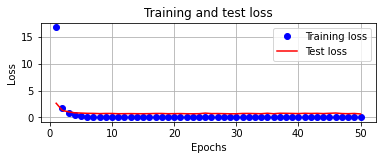

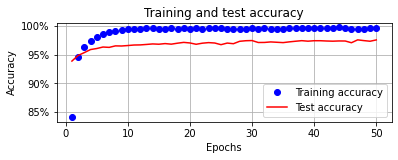

In [346]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

We notice that there is a gap between the training and test accuracy/loss values, indicating that there is potential **overfitting** on top of the training dataset. Overfitting is the phenomenon where the model specializes on the training data that it might not work as well on the test dataset.

Let's calculate the accuracy of the model manually:

In [106]:
preds = model.predict(X_test)

In the preceding step, we are using the `predict` method to calculate the expected output values for a given input (`X_test` in this case) to the model.

In the following code, we loop over all the test predictions and for each one we obtain the index that has the highest probability value. We perform the same exercise for the actual values of the test dataset.

Finally, the number of correct predictions over the total number of data points in the test dataset is the accuracy of the model on the test dataset:

In [107]:
import numpy as np
correct = 0
for i in range(len(X_test)):
    pred = np.argmax(preds[i],axis=0)
    act = np.argmax(y_test[i],axis=0)
    if(pred==act):
        correct+=1
    else:
        continue

correct/len(X_test)

0.9715

## Scaling the input dataset

Scaling a dataset is a process where we limit the variables within a dataset to ensure they do not have a very wide range of different values. One way to achieve this is to divide each variable in the dataset by the maximum value of the variable. Typically, neural networks perform well when we scale the input datasets.

### Getting ready

To understand the impact of the scaling input on the output, let's contrast the scenario where we check the output when the input dataset is not scaled, with the output when the input dataset is scaled.

Input data is not scaled:

| Scenario | Input | Weight | Bias | Sigmoid |
| :-: | :-: | :-: | :-: | :-: |
| **1** | 255 | 0.01 | 0 | 0.93 |
| **2** | 255 | 0.1 | 0 | 1.00 |
| **3** | 255 | 0.2 | 0 | 1.00 |
| **4** | 255 | 0.3 | 0 | 1.00 |
| **5** | 255 | 0.4 | 0 | 1.00 |
| **6** | 255 | 0.5 | 0 | 1.00 |
| **7** | 255 | 0.6 | 0 | 1.00 |
| **8** | 255 | 0.7 | 0 | 1.00 |
| **9** | 255 | 0.8 | 0 | 1.00 |

In the preceding table, note that the output (sigmoid) did not vary a lot, even though the weight value varied from `0.01` to `0.8`. The `sigmoid` function is calculated as the sigmoid value of the multiplication of the input with the weight, and then adding a bias to it:

<div class="alert alert-block alert-warning">
<tt>output = 1/(1+np.exp(-(w*x + b))</tt>
</div>

The reason for no change in the sigmoid output is due to the fact that the multiplication of `w*x` is a large number (as `x` is a large number) resulting in the sigmoid value always falling in the saturated portion of the sigmoid curve.

Now let's multiply different weight values by a small input number, as follows:

| Scenario | Input | Weight | Bias | Sigmoid |
| :-: | :-: | :-: | :-: | :-: |
| **1** | 1 | 0.01 | 0 | 0.50 |
| **2** | 1 | 0.1 | 0 | 0.52 |
| **3** | 1 | 0.2 | 0 | 0.55 |
| **4** | 1 | 0.3 | 0 | 0.57 |
| **5** | 1 | 0.4 | 0 | 0.60 |
| **6** | 1 | 0.5 | 0 | 0.62 |
| **7** | 1 | 0.6 | 0 | 0.65 |
| **8** | 1 | 0.7 | 0 | 0.67 |
| **9** | 1 | 0.8 | 0 | 0.69 |

We see that the sigmoid output varies, as the input and weight values are small !

From this exercise, we learned about the importance of scaling the input dataset so that it results in a smaller value when the weights (provided the weights do not have a high range) are multiplied by the input values. This phenomenon results in the weight value not getting updated quickly enough.

Thus, to achieve the optimal weight value, we should scale our input dataset while initializing the weights to not have a huge range (typically, weights have a random value between `-1` and `+1` during initialization).

### How to do it...
There are multiple ways to scale a dataset. One way is to convert all data points to a value between `0` and `1` (dividing each data point by the maximum value in the total dataset). Another method is to normalize the dataset so that the values lie between `-1` and `+1` by subtracting each data point by the overall dataset mean, and then dividing each resulting data point by the standard deviation. 

Now we scale the training and test inputs to a value between `0` and `1`:

In [349]:
X_train = X_train/255
X_test = X_test/255

In [350]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
59/59 [==============================] - 0s 8ms/step - loss: 0.4767 - accuracy: 0.8725 - val_loss: 0.2265 - val_accuracy: 0.9344
Epoch 2/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1936 - accuracy: 0.9455 - val_loss: 0.1633 - val_accuracy: 0.9555
Epoch 3/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1411 - accuracy: 0.9602 - val_loss: 0.1254 - val_accuracy: 0.9633
Epoch 4/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1072 - accuracy: 0.9699 - val_loss: 0.1075 - val_accuracy: 0.9683
Epoch 5/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0849 - accuracy: 0.9764 - val_loss: 0.0939 - val_accuracy: 0.9729
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0695 - accuracy: 0.9809 - val_loss: 0.0822 - val_accuracy: 0.9757
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0563 - accuracy: 0.9850 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 8/50
59/59 [==

In [351]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

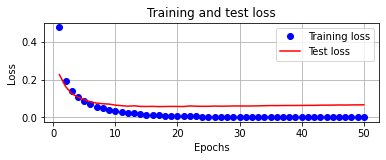

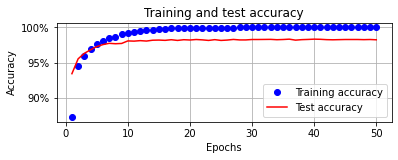

In [352]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

We should notice that training and test losses decrease smoothly over increasing epochs when compared to the non-scaled dataset that we saw in the previous section.

## Impact on training when the majority of inputs are non-zero
So far, we have not looked at the distribution of values in the input dataset.

### Getting ready

In this section, we will invert the background color and the foreground color. The intuition for this change impacting the model accuracy is as follows.

The pixels in the corner of images do not contribute toward predicting the label of an image. Given that a black pixel (original scenario) has a pixel value of zero, it is automatically taken care of, as when this input is multiplied by any weight value, the output is zero. This will result in the network learning that any change in the weight value connecting this corner pixel to a hidden layer will not have an impact on changing the loss value.

However, if we have a white pixel in the corner, it will contribute toward certain hidden unit values, and thus the weights need to be fine-tuned until the impact of the corner pixels on the predicted label is minimal.

### How to do it...

1. Let's look at the distribution of the input values:

<div class="alert alert-block alert-warning">
<tt>X_train.flatten()</tt>
</div>

The preceding code flattens all the inputs into a single list:

In [46]:
X_train.flatten().shape

(47040000,)

In [47]:
X_train.shape[0]*num_pixels

47040000

Let's plot the distribution of all the input values:

Text(0, 0.5, 'Frequency of input values')

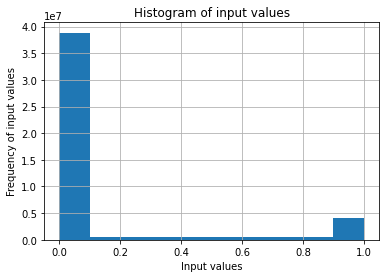

In [48]:
plt.hist(X_train.flatten())
plt.grid('off')
plt.title('Histogram of input values')
plt.xlabel('Input values')
plt.ylabel('Frequency of input values')

We notice that the majority of the inputs are zero (all the input images have a background that is black).

2. Let's explore a scenario where we invert the colors (background is white and letters are written in black):

In [49]:
X_train = 1-X_train
X_test = 1-X_test

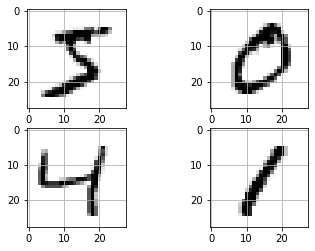

In [50]:
plt.subplot(221)
plt.imshow(X_train[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

Text(0, 0.5, 'Frequency of input values')

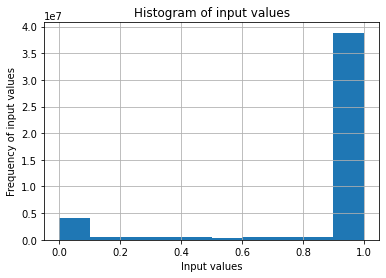

In [51]:
plt.hist(X_train.flatten())
plt.grid('off')
plt.title('Histogram of input values')
plt.xlabel('Input values')
plt.ylabel('Frequency of input values')

3. Build our model using the same model architecture that we built in the previous section:

In [52]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
59/59 [==============================] - 0s 8ms/step - loss: 1.3914 - accuracy: 0.6251 - val_loss: 0.6008 - val_accuracy: 0.8516
Epoch 2/50
59/59 [==============================] - 0s 7ms/step - loss: 0.5186 - accuracy: 0.8634 - val_loss: 0.4226 - val_accuracy: 0.8859
Epoch 3/50
59/59 [==============================] - 0s 7ms/step - loss: 0.4133 - accuracy: 0.8855 - val_loss: 0.3633 - val_accuracy: 0.8994
Epoch 4/50
59/59 [==============================] - 0s 7ms/step - loss: 0.3734 - accuracy: 0.8926 - val_loss: 0.3453 - val_accuracy: 0.9018
Epoch 5/50
59/59 [==============================] - 0s 7ms/step - loss: 0.3448 - accuracy: 0.8999 - val_loss: 0.3136 - val_accuracy: 0.9110
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 0.3277 - accuracy: 0.9058 - val_loss: 0.3131 - val_accuracy: 0.9074
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.3136 - accuracy: 0.9096 - val_loss: 0.2892 - val_accuracy: 0.9197
Epoch 8/50
59/59 [==

4. Plot the training and test accuracy and loss values over different epochs:

In [53]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

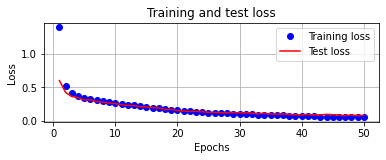

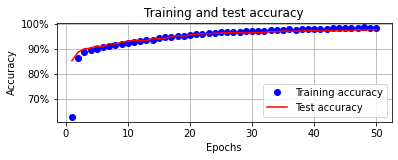

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

We note that training / test accuracy values have now fallen to `0.9845/0.9756`, compared to `1.0000/0.9822` obtained on the dataset that has a majority of zeros. 

The intuition for the decrease in model accuracy when the majority of data points are non-zero is that a higher number of weights need to be fine-tuned (model has to make predictions based on a large amount of pixel values).

## Impact of batch size on model accuracy

### Getting ready

When the batch size is small, less data points are considered to calculate the loss value. This results in more batches per epoch (as in an epoch you would have to go through all the training data points in the dataset). Consequently, the number of weight updates per epoch will be high.

Thus, the lower the batch size, the better the accuracy for the same number of epochs. However, you should also ensure that the batch size is not too small so that it might overfit on top of a small batch of data. 

### How to do it...

In the previous recipe, we built a model with a batch size of `1024`. In the present recipe, we use a batch size of `30000` (the total dataset size is `60000`).

1. Preprocess the dataset and fit the model as follows:  

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=30000, verbose=1)

Epoch 1/50
2/2 [==============================] - 0s 130ms/step - loss: 2.1391 - accuracy: 0.3586 - val_loss: 1.5872 - val_accuracy: 0.6955
Epoch 2/50
2/2 [==============================] - 0s 91ms/step - loss: 1.4550 - accuracy: 0.7252 - val_loss: 1.0666 - val_accuracy: 0.8066
Epoch 3/50
2/2 [==============================] - 0s 92ms/step - loss: 0.9979 - accuracy: 0.8110 - val_loss: 0.7599 - val_accuracy: 0.8460
Epoch 4/50
2/2 [==============================] - 0s 92ms/step - loss: 0.7349 - accuracy: 0.8389 - val_loss: 0.5874 - val_accuracy: 0.8601
Epoch 5/50
2/2 [==============================] - 0s 93ms/step - loss: 0.5817 - accuracy: 0.8530 - val_loss: 0.4886 - val_accuracy: 0.8719
Epoch 6/50
2/2 [==============================] - 0s 91ms/step - loss: 0.4922 - accuracy: 0.8649 - val_loss: 0.4318 - val_accuracy: 0.8854
Epoch 7/50
2/2 [==============================] - 0s 93ms/step - loss: 0.4372 - accuracy: 0.8775 - val_loss: 0.3934 - val_accuracy: 0.8919
Epoch 8/50
2/2 [==========

2. Plot the training and test accuracy and loss values over different epochs:

In [354]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

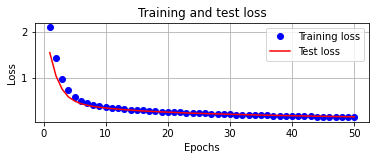

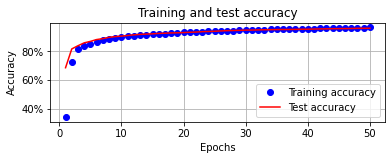

In [355]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

Note the results on training accuracy:

| Scenario | batch_size | accuracy Epoc 1 |  accuracy Epoc 50 | 
| :-: | :-: | :-: | :-: |
| **Present** | 30000 | 0.3421 | 0.9653 | 
| **Previous** | 1024 | 0.8725 | 1.0000 | 

When the batch size is high, the model accuracy is much lower initially and reaches a considerable value (`0.96`) at a much later epoch.

Considering that total dataset size is `60000` and we run the model for `50` epochs: 

| Scenario | batch_size | number of weight updates | 
| :-: | :-: | :-: | 
| **Present** | 30000 | 50 * (60000 / 30000) = **100** | 
| **Previous** | 1024 | 50 * (60000 / 1024) = **2929** | 

Hence, the lower the batch size, the more times the weights get updated and the better the accuracy for the same number of epochs.

## Building a deep neural network to improve accuracy

Until now, we have looked at model architectures where the neural network has only one hidden layer between the input and the output layers. In this section, we will look at the neural network where there are multiple hidden layers (and hence a **deep** neural network).

### Getting ready

Multiple hidden layers ensure that the neural network learns a complex non-linear relation between the input and output.

### How to do it...

1. Load the dataset and scale it:

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

2. Build (*set up*) a model with multiple hidden layers connecting the input and output layers: 

In [193]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

The preceding model architecture can be visualized as follows:

In [194]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_27 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_28 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_29 (Dense)             (None, 10)                10010     
Total params: 2,797,010
Trainable params: 2,797,010
Non-trainable params: 0
_________________________________________________________________


3. Compile and fit the model:

In [66]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
59/59 [==============================] - 2s 26ms/step - loss: 0.3711 - accuracy: 0.8906 - val_loss: 0.1258 - val_accuracy: 0.9617
Epoch 2/50
59/59 [==============================] - 1s 24ms/step - loss: 0.0969 - accuracy: 0.9711 - val_loss: 0.0789 - val_accuracy: 0.9749
Epoch 3/50
59/59 [==============================] - 1s 25ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0692 - val_accuracy: 0.9789
Epoch 4/50
59/59 [==============================] - 1s 25ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0661 - val_accuracy: 0.9790
Epoch 5/50
59/59 [==============================] - 1s 24ms/step - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0639 - val_accuracy: 0.9806
Epoch 6/50
59/59 [==============================] - 1s 24ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0679 - val_accuracy: 0.9799
Epoch 7/50
59/59 [==============================] - 1s 25ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0672 - val_accuracy: 0.9813
Epoch 8/50
59

4. Plot the training and test accuracy and loss values over different epochs:

In [67]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

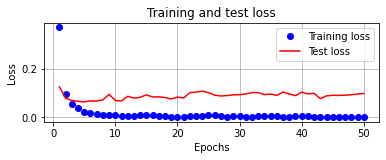

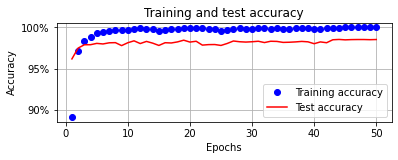

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

Note the results on test accuracy:

| Model architecture | hidden layers | accuracy Epoc 1 |  accuracy Epoc 50 | 
| :-: | :-: | :-: | :-: |
| **Present** | multiple | 0.9617 | 0.9853 | 
| **Previous** | simple | 0.9344 | 0.9825 | 

This way, a *deep neural network* architecture reaches a better accuracy for the same number of epochs.

Note that, in present scenario, there is a considerable gap between training and test loss, indicating that the *deep* architecture specialized on training data. In future sections we will learn about ways to avoid **overfitting** on training data.

## Varying the learning rate to improve accuracy

So far, in the previous recipes, we used the default learning rate of the `Adam` optimizer, which is `0.001`. In this section, we will manually set the learning rate to a higher number and see the impact of changing the learning rate on model accuracy.

### Getting ready

We learned that a change in a weight's value is equal to the decrease in loss multiplied by the learning rate. Hence, the lower the learning rate, the lower the change in the weight value.

The learning rate controls how much to change the model in response to the estimated error each time the model weights are updated. A value too small may result in a long training process, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

Let's consider the *toy* example of fitting the `y = 2x` line as we saw in the [notebook on network details](./001-Neural_network_details.ipynb):

1. Initialize the dataset:

In [69]:
x = [[1],[2],[3],[4]]
y = [[2],[4],[6],[8]]

2. Initialize the weight and bias values randomly:

In [70]:
w = [1.5, 0.]

3. Define the feed-forward network:

In [71]:
import numpy as np
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0]) + weights[1]
    squared_error = (np.square(out - outputs))
    return squared_error

4. Create the function which performs the back propagation process to update weights (we pass the learning rate as a parameter):

In [90]:
from copy import deepcopy
def update_weights(inputs, outputs, weights, epochs, lr):  
    for epoch in range(epochs):
        org_loss = feed_forward(inputs, outputs, weights)  
        wts_tmp = deepcopy(weights)
        wts_tmp2 = deepcopy(weights)
        for ix, wt in enumerate(weights): 
            wts_tmp[-(ix+1)] += 0.0001
            # print('wts_tmp:', wts_tmp)
            loss = feed_forward(inputs, outputs, wts_tmp)
            # print('loss', loss)
            delta_loss = np.sum(org_loss - loss)/(0.0001*len(inputs))
            wts_tmp2[-(ix+1)] += delta_loss*lr
            wts_tmp = deepcopy(weights)

        weights = deepcopy(wts_tmp2)
    return wts_tmp2

And now, run to see the effect of changing the learning rate on the weight value!

In [134]:
rates = [0.001, 0.01, 0.1]
nr = len(rates) 
w_val = [[] for i in range(nr)]
b_val = [[] for i in range(nr)]
ir = -1

for r in rates:
    ir = ir+1
    for k in range(100):
        w_new, b_new = update_weights(x,y,w,(k+1), r)
        w_val[ir].append(w_new)
        b_val[ir].append(b_new)

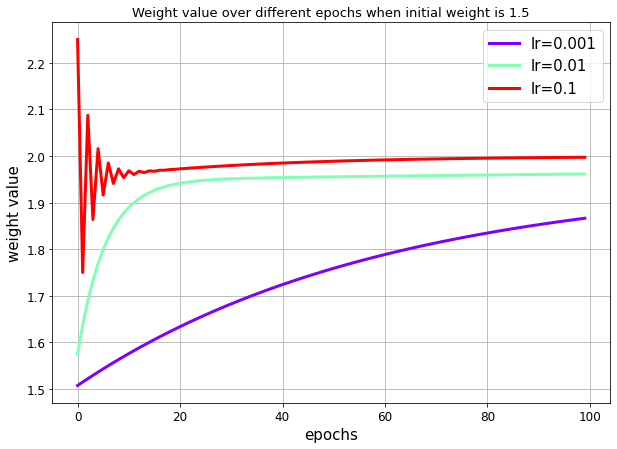

In [137]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

colors = iter(cm.rainbow(np.linspace(0,1,nr)))
plt.figure(figsize=(10,7))
ir = -1

for r in rates:
    ir = ir+1
    plt.plot(w_val[ir],color=next(colors),linestyle='-',linewidth=3,label='lr='+str(r)[0:5])
    
plt.title('Weight value over different epochs when initial weight is 1.5',fontsize=13)
plt.xlabel('epochs',fontsize=15)
plt.ylabel('weight value',fontsize=15)
plt.legend(loc=0,fontsize=15)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.grid('off')

Note that the weight value converges faster to the optimal solution (`2`) as the learning rate increases. In the case `lr = 0.1` there is a drastic change in the weight values initially!!! 

That oscillation amplitude will increase as the parameter `lr` is raised above `0.1`, and eventually the solution does not achieve convergence to the optimal solution but the weight value will get stuck in a **local minima**!!!

### How to do it...

Now, let's see the impact of the learning rate in action on the MNIST dataset. 

1. Load the dataset and scale it:

In [370]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

2. Run to see the effect of changing the learning rate of the Adam optimizer (default is `0.001`) on the test accuracy!

In [371]:
from keras.optimizers import Adam

rates = [0.0001,0.001,0.1]
nr = len(rates) 
val_acc_list = [[] for i in range(nr)]
ir = -1

for r in rates:
    # Initialize the model and define the model architecture:
    model = Sequential()
    model.add(Dense(1000, input_dim=784, activation='relu'))
    model.add(Dense(10, activation='softmax'))    
    # Set up the learning rate of the Adam optimizer:
    opt = Adam(lr=r)
    # Compile and fit the model:
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)
    # Extract accuracy metrics for test datasets:
    history_dict = history.history
    val_acc = history_dict['val_accuracy']
    # Save results in a list:
    ir = ir+1
    val_acc_list[ir].append(val_acc)
    
epochs = range(1, len(val_acc) + 1)

Epoch 1/50
59/59 [==============================] - 0s 8ms/step - loss: 1.4497 - accuracy: 0.6791 - val_loss: 0.7831 - val_accuracy: 0.8597
Epoch 2/50
59/59 [==============================] - 0s 7ms/step - loss: 0.6059 - accuracy: 0.8719 - val_loss: 0.4580 - val_accuracy: 0.8979
Epoch 3/50
59/59 [==============================] - 0s 7ms/step - loss: 0.4228 - accuracy: 0.8972 - val_loss: 0.3618 - val_accuracy: 0.9128
Epoch 4/50
59/59 [==============================] - 0s 7ms/step - loss: 0.3515 - accuracy: 0.9104 - val_loss: 0.3142 - val_accuracy: 0.9193
Epoch 5/50
59/59 [==============================] - 0s 7ms/step - loss: 0.3108 - accuracy: 0.9185 - val_loss: 0.2845 - val_accuracy: 0.9238
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 0.2826 - accuracy: 0.9256 - val_loss: 0.2626 - val_accuracy: 0.9283
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.2611 - accuracy: 0.9307 - val_loss: 0.2454 - val_accuracy: 0.9332
Epoch 8/50
59/59 [==

Epoch 17/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1231 - accuracy: 0.9688 - val_loss: 0.2869 - val_accuracy: 0.9531
Epoch 18/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1396 - accuracy: 0.9670 - val_loss: 0.3122 - val_accuracy: 0.9507
Epoch 19/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1327 - accuracy: 0.9679 - val_loss: 0.2973 - val_accuracy: 0.9494
Epoch 20/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1215 - accuracy: 0.9696 - val_loss: 0.3150 - val_accuracy: 0.9541
Epoch 21/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1345 - accuracy: 0.9671 - val_loss: 0.3747 - val_accuracy: 0.9470
Epoch 22/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1354 - accuracy: 0.9672 - val_loss: 0.2766 - val_accuracy: 0.9509
Epoch 23/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1233 - accuracy: 0.9700 - val_loss: 0.2959 - val_accuracy: 0.9519
Epoch 24/50
5

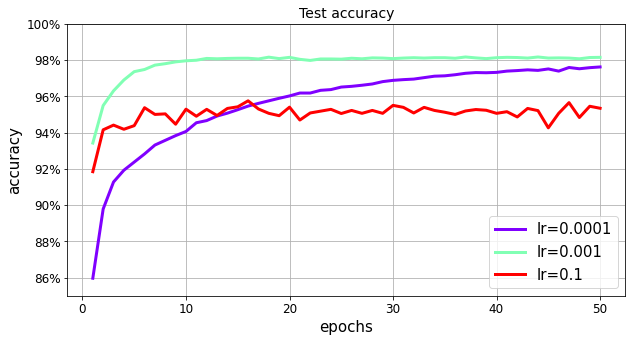

In [377]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

colors = iter(cm.rainbow(np.linspace(0,1,nr)))
plt.figure(figsize=(10,5))
ir = -1

for r in rates:
    ir = ir+1
    val_acc = np.hstack(val_acc_list[ir])
    plt.plot(epochs,val_acc,color=next(colors),linestyle='-',linewidth=3,label='lr='+str(r)[0:6])
    
plt.ylim(0.85,1.0)
plt.title('Test accuracy',fontsize=14)
plt.xlabel('epochs',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend(loc=4,fontsize=15)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.grid('off')
plt.show()

Note that the low-learning-rate model updates the weights slowly, thereby resulting in a *smoothly* reducing loss function, as well as a high accuracy, which was achieved slowly over a higher number of epochs.

Alternatively, the *step-like* changes in loss values when the learning rate is higher are due to the loss values getting stuck in a local minima until the weight values change to optimal values. 

A lower learning rate gives a **better** possibility of arriving at the optimal weight values, as the weights are changed slowly but steadily in the right direction!!! 

## Impact of varying optimizers on network accuracy

So far, in previous recipes, we considered the loss optimizer to be the *Adam* optimizer. However, there are multiple other variants, and a change in the optimizer is likely to impact the speed with which the model learns to fit the input and the output.

### Getting ready

You can learn about the various optimizers here: <a href="https://keras.io/optimizers/">keras optimizers</a>. 

Additionally, you can find the source code of each optimizer here: <a href="https:/github.com/keras-team/keras/blob/master/keras/optimizers.py/">github keras optimizers</a>.

### How to do it...

Now, let's see the impact of changing the optimizer on the MNIST dataset. 

1. Load the dataset and scale it:

In [378]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

2. Run to see the effect of changing the optimizer (*Adam* vs *SGD*) on the training and test accuracy values!

In [393]:
optims = ['adam','sgd']
nop = len(optims) 
acc_list = [[] for i in range(nop)]
val_acc_list = [[] for i in range(nop)]
ir = -1

for opt in optims:
    # Initialize the model and define the model architecture:
    model = Sequential()
    model.add(Dense(1000, input_dim=784, activation='relu'))
    model.add(Dense(10, activation='softmax'))    
    # Compile and fit the model:
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)
    # Extract accuracy metrics for training and test datasets:
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    # Save results in a list:
    ir = ir+1
    acc_list[ir].append(acc)
    val_acc_list[ir].append(val_acc)
    
epochs = range(1, len(acc) + 1)

Epoch 1/50
59/59 [==============================] - 0s 8ms/step - loss: 0.4723 - accuracy: 0.8717 - val_loss: 0.2265 - val_accuracy: 0.9369
Epoch 2/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1955 - accuracy: 0.9448 - val_loss: 0.1603 - val_accuracy: 0.9554
Epoch 3/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1411 - accuracy: 0.9606 - val_loss: 0.1266 - val_accuracy: 0.9643
Epoch 4/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1080 - accuracy: 0.9698 - val_loss: 0.1078 - val_accuracy: 0.9690
Epoch 5/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0848 - accuracy: 0.9763 - val_loss: 0.0939 - val_accuracy: 0.9728
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0692 - accuracy: 0.9810 - val_loss: 0.0848 - val_accuracy: 0.9741
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0575 - accuracy: 0.9847 - val_loss: 0.0753 - val_accuracy: 0.9775
Epoch 8/50
59/59 [==

Epoch 9/50
59/59 [==============================] - 0s 6ms/step - loss: 0.5856 - accuracy: 0.8670 - val_loss: 0.5453 - val_accuracy: 0.8776
Epoch 10/50
59/59 [==============================] - 0s 6ms/step - loss: 0.5549 - accuracy: 0.8707 - val_loss: 0.5181 - val_accuracy: 0.8805
Epoch 11/50
59/59 [==============================] - 0s 7ms/step - loss: 0.5297 - accuracy: 0.8740 - val_loss: 0.4956 - val_accuracy: 0.8835
Epoch 12/50
59/59 [==============================] - 0s 7ms/step - loss: 0.5086 - accuracy: 0.8771 - val_loss: 0.4764 - val_accuracy: 0.8846
Epoch 13/50
59/59 [==============================] - 0s 7ms/step - loss: 0.4905 - accuracy: 0.8798 - val_loss: 0.4603 - val_accuracy: 0.8877
Epoch 14/50
59/59 [==============================] - 0s 6ms/step - loss: 0.4750 - accuracy: 0.8821 - val_loss: 0.4461 - val_accuracy: 0.8904
Epoch 15/50
59/59 [==============================] - 0s 6ms/step - loss: 0.4614 - accuracy: 0.8844 - val_loss: 0.4337 - val_accuracy: 0.8924
Epoch 16/50
59

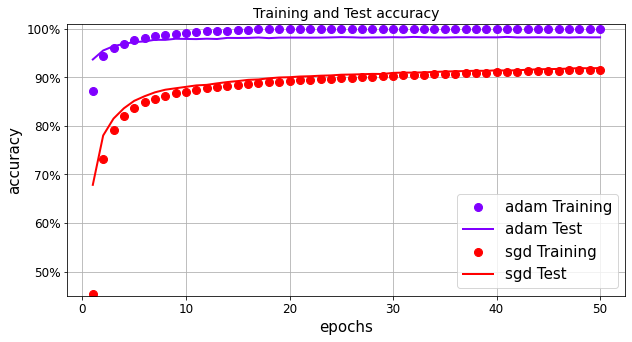

In [400]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

colors1 = iter(cm.rainbow(np.linspace(0,1,nop)))
colors2 = iter(cm.rainbow(np.linspace(0,1,nop)))
plt.figure(figsize=(10,5))
ir = -1

for opt in optims:
    ir = ir+1
    acc = np.hstack(acc_list[ir])
    val_acc = np.hstack(val_acc_list[ir])
    plt.plot(epochs,acc,color=next(colors1),linestyle='',marker='o',markersize=8,label=opt+' Training')
    plt.plot(epochs,val_acc,color=next(colors2),linestyle='-',linewidth=2,label=opt+' Test')

plt.ylim(0.45,1.01)
plt.title('Training and Test accuracy',fontsize=14)
plt.xlabel('epochs',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend(loc=4,fontsize=15)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.grid('off')
plt.show()

## Understanding overfitting

In the previous recipe using *Adam* optimizer, we have noticed that the training accuracy is ~100% while test accuracy is ~98%, which is a case of **overfitting**: after the fifth epoch, we are overoptimizing on the training data, and we end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

Let's contrast two scenarios where we compare a histogram of the weights:
* Model is run for 5 epochs 
* Model is run for 50 epochs 

### Scenario: 5 epochs 

In [5]:
model = Sequential()
model.add(Dense(1000, input_dim=784,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=1024, verbose=1)

Epoch 1/5
59/59 [==============================] - 1s 9ms/step - loss: 0.4772 - accuracy: 0.8697 - val_loss: 0.2348 - val_accuracy: 0.9334
Epoch 2/5
59/59 [==============================] - 0s 7ms/step - loss: 0.1980 - accuracy: 0.9437 - val_loss: 0.1605 - val_accuracy: 0.9542
Epoch 3/5
59/59 [==============================] - 0s 7ms/step - loss: 0.1422 - accuracy: 0.9597 - val_loss: 0.1246 - val_accuracy: 0.9630
Epoch 4/5
59/59 [==============================] - 0s 7ms/step - loss: 0.1090 - accuracy: 0.9697 - val_loss: 0.1065 - val_accuracy: 0.9694
Epoch 5/5
59/59 [==============================] - 0s 7ms/step - loss: 0.0863 - accuracy: 0.9765 - val_loss: 0.0936 - val_accuracy: 0.9715


Plot the histogram of weights that connect the hidden layer to
the output layer:

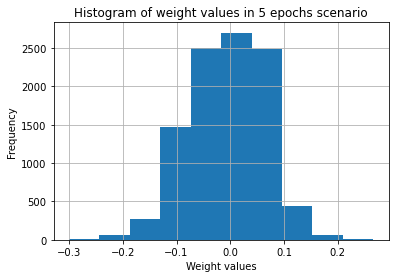

In [8]:
plt.hist(model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values in 5 epochs scenario')
plt.grid('off')

### Scenario: 50 epochs (reference model) 

In [9]:
ref_model = Sequential()
ref_model.add(Dense(1000, input_dim=784,activation='relu'))
ref_model.add(Dense(10, activation='softmax'))
ref_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ref_history = ref_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
59/59 [==============================] - 0s 8ms/step - loss: 0.4793 - accuracy: 0.8692 - val_loss: 0.2259 - val_accuracy: 0.9361
Epoch 2/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1960 - accuracy: 0.9445 - val_loss: 0.1622 - val_accuracy: 0.9528
Epoch 3/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1396 - accuracy: 0.9610 - val_loss: 0.1258 - val_accuracy: 0.9637
Epoch 4/50
59/59 [==============================] - 0s 7ms/step - loss: 0.1057 - accuracy: 0.9707 - val_loss: 0.1062 - val_accuracy: 0.9693
Epoch 5/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0842 - accuracy: 0.9764 - val_loss: 0.0934 - val_accuracy: 0.9724
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0694 - accuracy: 0.9807 - val_loss: 0.0872 - val_accuracy: 0.9736
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.0567 - accuracy: 0.9850 - val_loss: 0.0779 - val_accuracy: 0.9749
Epoch 8/50
59/59 [==

In [10]:
ref_history_dict = ref_history.history
ref_loss = ref_history_dict['loss']
ref_val_loss = ref_history_dict['val_loss']
ref_acc = ref_history_dict['accuracy']
ref_val_acc = ref_history_dict['val_accuracy']
epochs = range(1, len(ref_val_loss) + 1)

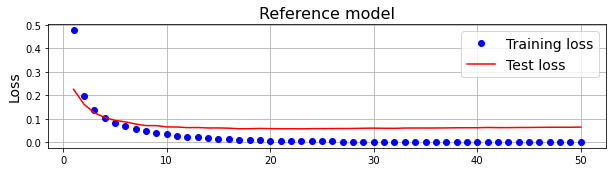

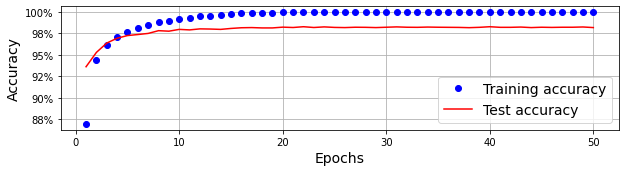

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(epochs, ref_loss, 'bo', label='Training loss')
plt.plot(epochs, ref_val_loss, 'r', label='Test loss')
plt.title('Reference model',fontsize=16)
plt.ylabel('Loss',fontsize=14)
plt.legend(fontsize=14)
plt.grid('off')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(212)
plt.plot(epochs, ref_acc, 'bo', label='Training accuracy')
plt.plot(epochs, ref_val_acc, 'r', label='Test accuracy')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend(fontsize=14)
plt.grid('off')
plt.show()

Plot the histogram of weights that connect the hidden layer to
the output layer:

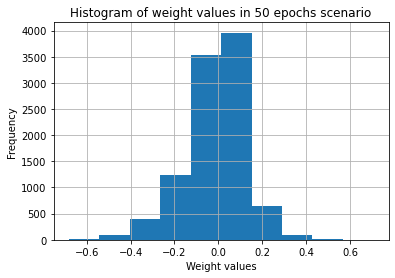

In [11]:
plt.hist(ref_model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values in 50 epochs scenario')
plt.grid('off')

### Problem With Large Weights

The longer we train the network, the more specialized the weights will become to the training data, overfitting the training data. The weights will grow in size in order to handle the specifics of the examples seen in the training data.

Large weights make the network *unstable*. Although the weight will be specialized to the training dataset, minor variation or statistical noise on the expected inputs will result in large differences in the output.

A model with *large weights* is more complex than a model with *smaller weights*. It is a sign of a network that may be overly specialized to training data. Simpler models are less likely to overfit than complex ones. A *simple model* in this context is a model where the distribution of parameter values has less entropy.

Having small weights or even zero weights for less relevant or irrelevant inputs to the network will allow the model to focus learning!

## Adding weight regularization to reduce overfitting

A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to take only small values, which makes the distribution of weight values more regular. This is called *weight regularization*, and it’s done by adding to the loss function of the network a cost associated with having large
weights. This cost comes in two flavors:

* *L1 regularization*: The cost added is proportional to the absolute value of the weight coefficients.
* *L2 regularization*: The cost added is proportional to the square of the value of the weight coefficients.

Regularization gives a **penalty** because we are *penalizing* the model proportional to the size of the weights!

### Scenario: L2-regularized model

In Keras, weight regularization is added by passing *weight regularizer instances* to layers as keyword arguments. Let’s add L2 weight regularization to the model:

In [39]:
from keras.regularizers import l2

In [68]:
l2_model = Sequential()
l2_model.add(Dense(1000, input_dim=784, activation='relu', kernel_regularizer=l2(0.001)))
l2_model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))
l2_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
l2_history = l2_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
59/59 [==============================] - 1s 9ms/step - loss: 1.0369 - accuracy: 0.8697 - val_loss: 0.5927 - val_accuracy: 0.9314
Epoch 2/50
59/59 [==============================] - 0s 8ms/step - loss: 0.4995 - accuracy: 0.9379 - val_loss: 0.4146 - val_accuracy: 0.9464
Epoch 3/50
59/59 [==============================] - 0s 8ms/step - loss: 0.3752 - accuracy: 0.9518 - val_loss: 0.3368 - val_accuracy: 0.9542
Epoch 4/50
59/59 [==============================] - 0s 8ms/step - loss: 0.3145 - accuracy: 0.9581 - val_loss: 0.2911 - val_accuracy: 0.9605
Epoch 5/50
59/59 [==============================] - 0s 8ms/step - loss: 0.2838 - accuracy: 0.9624 - val_loss: 0.2776 - val_accuracy: 0.9626
Epoch 6/50
59/59 [==============================] - 0s 8ms/step - loss: 0.2644 - accuracy: 0.9647 - val_loss: 0.2612 - val_accuracy: 0.9646
Epoch 7/50
59/59 [==============================] - 0s 8ms/step - loss: 0.2530 - accuracy: 0.9678 - val_loss: 0.2496 - val_accuracy: 0.9685
Epoch 8/50
59/59 [==

where `l2(0.001)` means every coefficient in the weight matrix of the layer will add `0.001*weight_coefficient_value` to the total loss of the network. Let's see the impact of the L2 regularization penalty on the training and test accuracy and loss values:

In [69]:
l2_history_dict = l2_history.history
l2_loss = l2_history_dict['loss']
l2_val_loss = l2_history_dict['val_loss']
l2_acc = l2_history_dict['accuracy']
l2_val_acc = l2_history_dict['val_accuracy']
epochs = range(1, len(l2_val_loss) + 1)

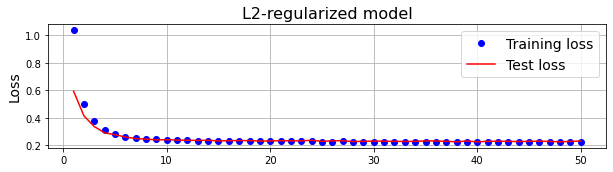

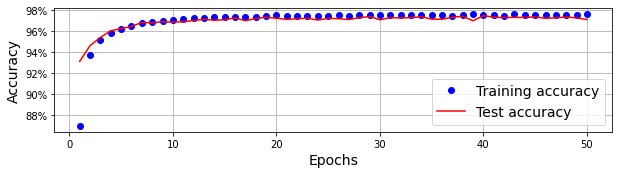

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(epochs, l2_loss, 'bo', label='Training loss')
plt.plot(epochs, l2_val_loss, 'r', label='Test loss')
plt.title('L2-regularized model',fontsize=16)
plt.ylabel('Loss',fontsize=14)
plt.legend(fontsize=14)
plt.grid('off')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(212)
plt.plot(epochs, l2_acc, 'bo', label='Training accuracy')
plt.plot(epochs, l2_val_acc, 'r', label='Test accuracy')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend(fontsize=14)
plt.grid('off')
plt.show()

Plot the histogram of weights that connect the hidden layer to
the output layer:

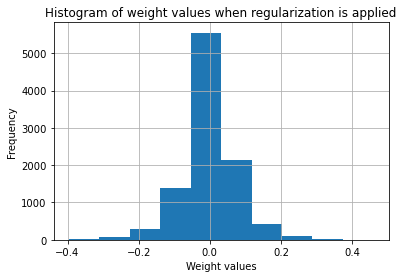

In [43]:
plt.hist(l2_model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values when regularization is applied')
plt.grid('off')

We notice that:
* The model with L2 regularization has become much more resistant to overfitting than the reference model.
* Post regularization the training data accuracy reduces to 98%.
* Post regularization the majority of weights are much closer to zero.

## Applying dropout to reduce overfitting

Dropout, applied to a layer, consists of randomly *dropping out* (setting to zero) a number of output features of the layer during training. Let’s say a given layer would normally return a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, `[0, 0.5, 1.3, 0, 1.1]`. The *dropout rate* is the fraction of the features that are zeroed out; it’s usually set between `0.2` and `0.5`. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant, which the network would start memorizing if no noise was present.

### Scenario: Dropout-regularized model

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer:

In [52]:
dr_model = Sequential()
dr_model.add(Dense(1000, input_dim=784, activation='relu'))
dr_model.add(Dropout(0.8))
dr_model.add(Dense(10, activation='softmax'))
dr_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dr_history = dr_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
59/59 [==============================] - 1s 11ms/step - loss: 0.6423 - accuracy: 0.8037 - val_loss: 0.2582 - val_accuracy: 0.9285
Epoch 2/50
59/59 [==============================] - 1s 9ms/step - loss: 0.2935 - accuracy: 0.9132 - val_loss: 0.1891 - val_accuracy: 0.9442
Epoch 3/50
59/59 [==============================] - 1s 9ms/step - loss: 0.2375 - accuracy: 0.9313 - val_loss: 0.1569 - val_accuracy: 0.9548
Epoch 4/50
59/59 [==============================] - 1s 9ms/step - loss: 0.2008 - accuracy: 0.9417 - val_loss: 0.1344 - val_accuracy: 0.9597
Epoch 5/50
59/59 [==============================] - 1s 9ms/step - loss: 0.1804 - accuracy: 0.9482 - val_loss: 0.1232 - val_accuracy: 0.9642
Epoch 6/50
59/59 [==============================] - 1s 9ms/step - loss: 0.1609 - accuracy: 0.9536 - val_loss: 0.1100 - val_accuracy: 0.9670
Epoch 7/50
59/59 [==============================] - 1s 9ms/step - loss: 0.1489 - accuracy: 0.9567 - val_loss: 0.1028 - val_accuracy: 0.9689
Epoch 8/50
59/59 [=

In [53]:
dr_history_dict = dr_history.history
dr_loss = dr_history_dict['loss']
dr_val_loss = dr_history_dict['val_loss']
dr_acc = dr_history_dict['accuracy']
dr_val_acc = dr_history_dict['val_accuracy']
epochs = range(1, len(dr_val_loss) + 1)

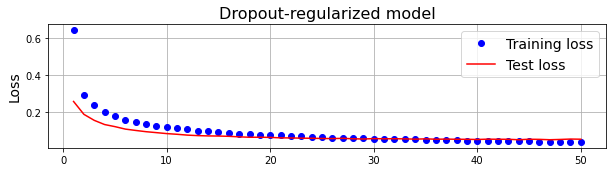

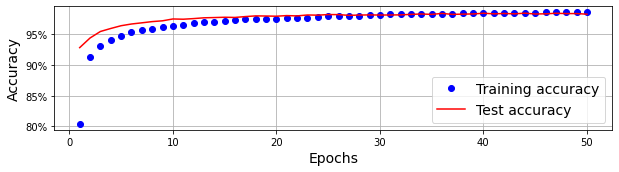

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(epochs, dr_loss, 'bo', label='Training loss')
plt.plot(epochs, dr_val_loss, 'r', label='Test loss')
plt.title('Dropout-regularized model',fontsize=16)
plt.ylabel('Loss',fontsize=14)
plt.legend(fontsize=14)
plt.grid('off')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(212)
plt.plot(epochs, dr_acc, 'bo', label='Training accuracy')
plt.plot(epochs, dr_val_acc, 'r', label='Test accuracy')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend(fontsize=14)
plt.grid('off')
plt.show()

Plot the histogram of weights that connect the hidden layer to
the output layer:

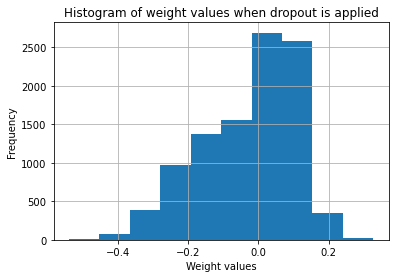

In [55]:
plt.hist(dr_model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values when dropout is applied')
plt.grid('off')

Again, this is a clear improvement over the reference network!

## Adding batch normalization

In a previous section on the scaling dataset, we learned that optimization is slow when the *input data* is not scaled. Note that this phenomenon (high input values resulting in a slow optimization) holds true when *hidden layer values* are large as well!

**Batch normalization** comes to the rescue in this scenario: previous examples normalized data before feeding it into models. But *data normalization* should be a concern after every transformation operated by the network!

A common form of data normalization is one we have already mentioned: centering the data on `0` by subtracting the mean from the data, and giving the data a unit standard deviation by dividing the data by its standard deviation. In effect, this makes the assumption that the data follows a normal (or Gaussian) distribution:

<div class="alert alert-block alert-warning">
<tt>normalized_data = (data - np.mean(data, axis=...)) / np.std(data, axis=...)</tt>
</div>

Batch normalization is a type of layer (`BatchNormalization` in Keras) which can adaptively normalize data even as the mean and variance change over time during training. The main effect of batch normalization is that it helps with gradient propagation and thus allows for deeper networks. 

### How to do it...

1. Import the `BatchNormalization` method:

In [61]:
from keras.layers.normalization import BatchNormalization

2. Instantiate a model and build the same architecture as we built when using the regularization technique. The only addition is that we perform batch normalization in a hidden layer:

In [64]:
from keras.regularizers import l2
from keras.optimizers import Adam

bat_model = Sequential()
bat_model.add(Dense(1000, input_dim=784, activation='relu', kernel_regularizer = l2(0.001)))
bat_model.add(BatchNormalization())
bat_model.add(Dense(10, activation='softmax', kernel_regularizer = l2(0.001)))
bat_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bat_history = bat_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
59/59 [==============================] - 1s 13ms/step - loss: 0.9490 - accuracy: 0.9095 - val_loss: 1.3398 - val_accuracy: 0.9010
Epoch 2/50
59/59 [==============================] - 1s 12ms/step - loss: 0.4995 - accuracy: 0.9742 - val_loss: 1.0368 - val_accuracy: 0.9550
Epoch 3/50
59/59 [==============================] - 1s 12ms/step - loss: 0.3574 - accuracy: 0.9854 - val_loss: 0.8229 - val_accuracy: 0.9589
Epoch 4/50
59/59 [==============================] - 1s 12ms/step - loss: 0.2692 - accuracy: 0.9901 - val_loss: 0.6171 - val_accuracy: 0.9667
Epoch 5/50
59/59 [==============================] - 1s 12ms/step - loss: 0.2073 - accuracy: 0.9934 - val_loss: 0.4810 - val_accuracy: 0.9708
Epoch 6/50
59/59 [==============================] - 1s 12ms/step - loss: 0.1664 - accuracy: 0.9946 - val_loss: 0.3400 - val_accuracy: 0.9685
Epoch 7/50
59/59 [==============================] - 1s 12ms/step - loss: 0.1394 - accuracy: 0.9946 - val_loss: 0.2691 - val_accuracy: 0.9748
Epoch 8/50
59

In [65]:
bat_history_dict = bat_history.history
bat_loss = bat_history_dict['loss']
bat_val_loss = bat_history_dict['val_loss']
bat_acc = bat_history_dict['accuracy']
bat_val_acc = bat_history_dict['val_accuracy']
epochs = range(1, len(bat_val_loss) + 1)

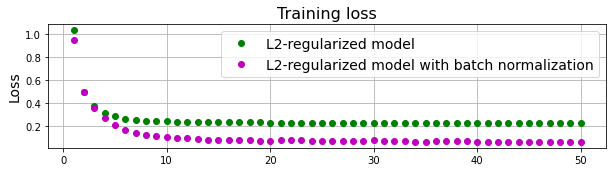

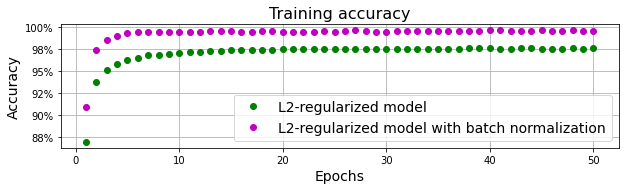

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(epochs, l2_loss, 'go', label='L2-regularized model')
plt.plot(epochs, bat_loss, 'mo', label='L2-regularized model with batch normalization')
plt.title('Training loss',fontsize=16)
plt.ylabel('Loss',fontsize=14)
plt.legend(fontsize=14)
plt.grid('off')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(212)
plt.plot(epochs, l2_acc, 'go', label='L2-regularized model')
plt.plot(epochs, bat_acc, 'mo', label='L2-regularized model with batch normalization')
plt.title('Training accuracy',fontsize=16)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend(fontsize=14)
plt.grid('off')
plt.show()

Thus, batch normalization results in much faster training!

In [1]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())